### 1. Предварительный анализ данных

In [1]:
# Загружаем все необходимые библиотеки
from scipy import stats as st
from scipy.stats import shapiro , normaltest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from numpy import percentile
sns.set(color_codes=True)
#from termcolor import colored

In [2]:
#Загружаем таблицы и передаем информации в переменные
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод по предварительному анализу:
Методом info() рассмотрена информация о количестве строк, пропусков и типе данных таблицы.
 - Name. Тип object , есть 2 пропуска. Возможно их можно удалить.
 - Platform. Тип object , пропусков нет. Нужно проверить тип платформ на уникальность и возможно привести к типовым значениям.
 - Year_of_Release. Тип float64, 1,6% пропусков. Возможно их можно удалить, т.к. заменить год можно приблизительно. Тип данных нужно привести к целым числам int64.
 - Genre. Тип object , есть 2 пропуска. Возможно их можно удалить. Также проверить значения на уникальность.
 - NA_sales. Тип float64. Пропусков нет.
 - EU_sales. Тип float64. Пропусков нет.
 - JP_sale. Тип float64. Пропусков нет.
 - Other_sales. Тип float64. Пропусков нет.
 - Critic_Score. Тип float64. Много пропусков. Возможно заменить тип данных на int64. Пропуски необходимо обработать и заменить значениями, возможно по доходу от игры.
 - User_Score. Тип object. Много пропусков. Возможно заменить тип данных на int64 после обработки пропусков. Возможно заменить пропуски по доходу от игры.
 - Rating. Тип object. Много пропусков. Пропуски необходимо проверить и возможно заменить по названию игр.

По краткому поиску в сети было обнаружено, что одним из источников данных является сайт metacritic.com.

Краткая информация по рейтингу ESRB.

ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association. Основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

### 2. Подготовка данных

#### Замена названий столбцов

In [5]:
# Преобразование названий столбцов
data_games.columns = [columns.lower() for columns in data_games.columns]
data_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Расчет суммарных продаж во всех регионах

In [6]:
# Складываем столбцы
data_games['sum_sales'] = (data_games['na_sales'] 
                         + data_games['eu_sales'] 
                         + data_games['jp_sales'] 
                         + data_games['other_sales'])
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


#### Обработка пропусков

#####  'name'

In [7]:
# Посмотрим на строки с пропусками в name
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [8]:
# Удаляем строки с пропусками в name
data_games.dropna(subset=['name'] , inplace = True)
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


- Пропуски в столбце name удалены

#####  'platform'

In [9]:
# Посмотрим на уникальные значения platform
data_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
# Посмотрим на строки с пропусками в platform
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


#####  'year_of_release'

In [11]:
# Посмотрим на уникальные значения year_of_release
data_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
# Определяем количество пропусков в столбце
data_games['year_of_release'].isna().sum()

269

In [13]:
# Посмотрим на строки с пропусками в year_of_release
data_games[data_games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09


In [14]:
# Удаляем строки с пропусками в year_of_release
data_games.dropna(subset=['year_of_release'] , inplace = True)
print('Пропуски удалены')
data_games['year_of_release'].isna().sum()

Пропуски удалены


0

#####  'critic_score'  ,   'user_score'  

In [15]:
# Количество пропусков в platform
data_games['critic_score'].isna().sum()

8461

In [16]:
# Посмотрим на уникальные значения platform
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [17]:
# Количество пропусков в user_score
data_games['user_score'].isna().sum()

6605

In [18]:
# Посмотрим на уникальные значения user_score
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
# Проверим значения tbd
data_games[data_games['user_score'] =='tbd'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24


In [20]:
# Заменим значения tbd на NaN
data_games.loc[data_games['user_score']=='tbd' , 'user_score'] = np.NaN

# Проверим на уникальные значения user_score после замены
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [21]:
# Определим сколько пропусков user_score и critic_score совпадают
data_games[data_games['user_score'].isna() & data_games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [22]:
# Определим сколько пропусков user_score и critic_score совпадают и при этом продажи минимальные
data_zero_sales = (data_games[data_games['user_score'].isna() &
                             data_games['critic_score'].isna() &
                             (data_games['sum_sales']<=0.01)]
                  )
print('Всего строк без оценок и продажами менее 0,01: ', len(data_zero_sales))
print('Всего строк только c продажами менее 0,01: ', len(data_games[data_games['sum_sales']<=0.01]))
data_zero_sales.head(5)

Всего строк без оценок и продажами менее 0,01:  516
Всего строк только c продажами менее 0,01:  780


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15564,Super Fruit Fall,Wii,2006.0,Puzzle,0.01,0.00,0.0,0.0,NaN,NaN,E,0.01
15597,Ratchet & Clank Collection,PSV,2014.0,Action,0.00,0.01,0.0,0.0,NaN,NaN,NaN,0.01
15608,The Cheetah Girls,GBA,2006.0,Misc,0.01,0.00,0.0,0.0,NaN,NaN,E,0.01
15615,Disney Infinity,PSV,2013.0,Action,0.01,0.00,0.0,0.0,NaN,NaN,NaN,0.01
15617,Teenage Mutant Ninja Turtles Double Pack,GBA,2006.0,Action,0.01,0.00,0.0,0.0,NaN,NaN,NaN,0.01


In [23]:
# Удаляем строки с пропусками user_score и critic_score и с минимальными продажами
data_games.drop(data_games[data_games['user_score'].isna() &
                           data_games['critic_score'].isna() & 
                           (data_games['sum_sales'] <= 0.01)].index , inplace=True)
# Проверим правильно ли все удалилось
data_games.query("sum_sales <= 0.01").head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15384,Order of War,PC,2009.0,Strategy,0.00,0.01,0.0,0.0,69.0,7.3,T,0.01
15486,Arslan: The Warriors of Legend,XOne,2016.0,Action,0.01,0.00,0.0,0.0,NaN,5.8,T,0.01
15499,Motocross Mania 3,XB,2005.0,Racing,0.01,0.00,0.0,0.0,38.0,3.6,T,0.01
15520,Pump It Up: Exceed,XB,2005.0,Misc,0.01,0.00,0.0,0.0,74.0,7.5,T,0.01
15542,Digimon Rumble Arena 2,XB,2004.0,Fighting,0.01,0.00,0.0,0.0,65.0,8.8,T,0.01


In [24]:
# Преобразуем данные user_score к численному типу
data_games['user_score'] = data_games['user_score'].astype(float)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15928 entries, 0 to 16705
Data columns (total 12 columns):
name               15928 non-null object
platform           15928 non-null object
year_of_release    15928 non-null float64
genre              15928 non-null object
na_sales           15928 non-null float64
eu_sales           15928 non-null float64
jp_sales           15928 non-null float64
other_sales        15928 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9690 non-null object
sum_sales          15928 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [25]:
# Определим сколько пропусков в user_score, когда в  critic_score нет пропусков
data_nan_user = data_games[data_games['user_score'].isna() & ~data_games['critic_score'].isna()]
print('Всего строк с оценкой критиков, но без оценки пользователей: ', len(data_nan_user))
data_games[data_games['user_score'].isna() & ~data_games['critic_score'].isna()].head(5)

Всего строк с оценкой критиков, но без оценки пользователей:  1089


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.2,0.28,85.0,NaN,T,5.24
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+,3.97
440,Need for Speed III: Hot Pursuit,PS,1998.0,Racing,2.14,0.86,0.0,0.13,88.0,NaN,E,3.13
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.0,0.10,83.0,NaN,E,2.44
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,NaN,E,2.42


In [26]:
# Определим связь средних значений и медиан между critic_score и user_score по платформам
# Сводная таблица по платформам с расчетом среднего и медианы для каждой платформы
data_games_user_critic = data_games.pivot_table(index = 'platform' , 
                       values = ['critic_score' , 'user_score' ] ,
                       aggfunc = ['median' , 'mean'] )
# Заменяем названия столбцов
data_games_user_critic.columns = ['median_critic_score' , 'median_user_score' , 'mean_critic_score' , 'mean_user_score' ] 

# Вводим столбцы с коэффициентам отношений средних и медиан оценок для разных платформ
data_games_user_critic['median_ratio'] = (data_games_user_critic['median_user_score'] / 
                                            data_games_user_critic['median_critic_score'])
data_games_user_critic['mean_ratio'] = (data_games_user_critic['mean_user_score'] / 
                                            data_games_user_critic['mean_critic_score'])
data_games_user_critic

,median_critic_score,median_user_score,mean_critic_score,mean_user_score,median_ratio,mean_ratio
platform,,,,,,
3DS,68.0,7.1,67.156627,6.852047,0.104412,0.102031
DC,88.0,8.8,87.357143,8.528571,0.100000,0.097629
DS,66.0,7.4,63.728814,7.022656,0.112121,0.110196
GBA,69.0,8.0,67.311628,7.669323,0.115942,0.113938
GC,70.0,8.0,69.601831,7.615686,0.114286,0.109418
PC,78.0,7.5,75.927039,7.065960,0.096154,0.093063
PS,73.5,8.3,71.586735,7.858491,0.112925,0.109776
PS2,70.0,8.0,68.714510,7.625328,0.114286,0.110971
PS3,73.0,7.1,70.468905,6.719512,0.097260,0.095354


In [27]:
# Среднее значение и медиана отношений оценок пользователей и критиков
data_games_user_critic[['mean_ratio' , 'median_ratio' ]].mean()

mean_ratio      0.102683
median_ratio    0.105127
dtype: float64

In [28]:
# Заменим пропуски user_score по известным значениям critic_score
data_games.loc[data_games['user_score'].isna() , 'user_score'] = (0.1*
                                                                    data_games.loc[~data_games['critic_score'].isna() &
                                                                                   data_games['user_score'].isna() ,
                                                                                   'critic_score']
                                                                 )

In [29]:
# Проверим результаты замены сколько пропусков в user_score, когда в  critic_score нет пропусков
data_games[data_games['user_score'].isna() & ~data_games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


#### 'rating'

In [30]:
# Количество пропусков значений rating
data_games['rating'].isna().sum()

6238

In [31]:
# Посмотрим на уникальные значения rating
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [32]:
# Значения К-А заменим на Е
data_games.loc[data_games['rating']=='K-A' , 'rating'] = 'E'
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [33]:
# Проверим результаты обработки данных
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15928 entries, 0 to 16705
Data columns (total 12 columns):
name               15928 non-null object
platform           15928 non-null object
year_of_release    15928 non-null float64
genre              15928 non-null object
na_sales           15928 non-null float64
eu_sales           15928 non-null float64
jp_sales           15928 non-null float64
other_sales        15928 non-null float64
critic_score       7983 non-null float64
user_score         8552 non-null float64
rating             9690 non-null object
sum_sales          15928 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


#### Преобразование данных к нужным типам

In [34]:
# Преобразуем данные year_of_release целому типу
data_games['year_of_release'] = data_games['year_of_release'].astype(int)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15928 entries, 0 to 16705
Data columns (total 12 columns):
name               15928 non-null object
platform           15928 non-null object
year_of_release    15928 non-null int64
genre              15928 non-null object
na_sales           15928 non-null float64
eu_sales           15928 non-null float64
jp_sales           15928 non-null float64
other_sales        15928 non-null float64
critic_score       7983 non-null float64
user_score         8552 non-null float64
rating             9690 non-null object
sum_sales          15928 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


#### Вывод по результатам подготовки данных:
##### Приведение названий столбцов к нижнему регистру
 Для удобства работы с таблицей имена столбцов приведены к нижнему регистру методом списков .lower().


##### Рвсчет суммарных продаж
 Суммарные продажи посчитаны до обработки пропусков, чтобы использовать это значение для анализа и обработки пропусков. Т.к. столбцов всего 4, то сложение выполнено напрямую без использования метода sum()


##### Обработка пропусков 
 - name. В столбце определены пропуски методом isna(). Обнаружены 2 строки, которые удалены, т.к. их отсутствие не повлияет н результаты исследования.
 - platform.   В столбце пропуски не обнаружены, поэтому оставлен без изменений.
 - year_of_release. В столбце обнаружены 269 пропусков. Строки с пропусками в столбце удалены, т.к. их количество незначительно относительно всей длины таблицы и соответственно не значительно повлияет на результат анализа, т.е. всего 269/16713 = 1,6%.
 - na_sales , eu_sales ,	jp_sales,	other_sales, sum_sales. В столбцах обнаружены нулевые значения, а также значения с продажами 0,01, при этом, проанализировав данные было обнаружено, что есть строки с пропусками в столбце critic_score, user_score и почти нулевыми продажами, всего таких строк 516. Т.к. игры с такими параметрами ничего не могут сказать о перспективах развития платформ, то принято решение удалить эти строки методом drop().
 - critic_score. В столбце обнаружено 8461 пропусков. Проанализировав пропуски было обнаружено, что пропуски есть в строках с пропусками в столбце user_score и почти нулевыми продажами, всего таких строк 516. Т.к. игры с такими параметрами ничего не могут сказать о перспективах развития платформ, то принято решение удалить эти строки методом drop(). Однозначной связи между продажами и оценками критиков не выявлено, поэтому оставшиеся пропуски оставлены без изменений.
 - user_score. В столбце обнаружено 6605 пропусков, а также значения 'tbd', которые являются по сути пропусками. На сайте metacritic.com такие значения присваиваются играм, которые имеют менее 4-х отзывов. Поэтому значения 'tbd' заменены значениями Nan методом np.NaN. Пропусков в user_score при наличии оценки в critic_score обнаружено 1089. Для дальнейшей работы со столбцом тип данных приведен к типу float. 
    Сравнив для каждой платформы значения оценок критиков и пользователей, было обнаружено, что в среднем они отличаются в 10 раз, т.е. на размерность шкалы. Поэтому принято решение заменить 1089 пропусков user_score по известной оценке critic_score, уменьшенной в 10 раз.
 - rating. После преобразований с другими столбцами в столбце осталось всего 6238 пропусков. Однозначно присвоить возрастной рейтинг игре нельзя, для этого как минимум должно быть описание игры. Поэтому оставляем пропуски столбца без изменений. В значениях есть значение К-А, которое присваивалось играм с нынешним рейтингом E (означает для всех) до 1998. Для сокращения уникальных значений столбца K-A заменено на E.

#### Преобразование данных 
- year_of_release. Данные приведены к целым числам, потому что год может принимать только дискретные значения.
- user_score. Данные приведены к вещественным числам, т.к. есть оценки с десятичным значением.
- na_sales , eu_sales ,	jp_sales,	other_sales, sum_sales. Столбцы оставлены без изменений, т.к. данные продаж важны и должны быть точными. Кроме этого есть много значений менее 1, которые обнулятся при приведении к целому типу.

 

### 3. Исследовательский анализ данных

#### Сколько игр выпускалось за разные годы?

In [35]:
# Делаем своднуб таблицу по сумме игр в каждый год
data_games_game_pivot = data_games.pivot_table(index = 'year_of_release' , values = 'name' ,  aggfunc = 'count')
# Выводим данные за последние 10 лет
data_games_game_pivot.tail(10)


,name
year_of_release,
2007,1151
2008,1362
2009,1364
2010,1206
2011,1102
2012,620
2013,518
2014,541
2015,576


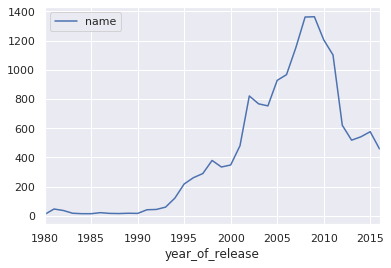

In [36]:
# График количества выпускаемых игр по годам
data_games_game_pivot.reset_index().plot(x= 'year_of_release' , y = 'name' )
plt.show()

#### Исследование платформ. 
Платформы с наибольшими суммарными продажами и их распределение по годам. 
    За какой характерный срок появляются новые и исчезают старые платформы?

In [37]:
# Создаем таблицу с суммой продаж по каждой платформе. Сортируем по убыванию. Рассматриваем 10 платформ
data_games_platform_pivot = (data_games.pivot_table(index = ['platform' ] 
                                                   , values = 'sum_sales' 
                                     
                                                   ,  aggfunc = 'sum').
                                         reset_index().
                                        sort_values(by= 'sum_sales' , ascending = False).head(10)
                             )
data_games_platform_pivot

,platform,sum_sales
16,PS2,1232.99
28,X360,961.01
17,PS3,931.07
26,Wii,890.78
4,DS,801.85
15,PS,727.52
18,PS4,314.03
6,GBA,312.61
19,PSP,288.69
2,3DS,257.54


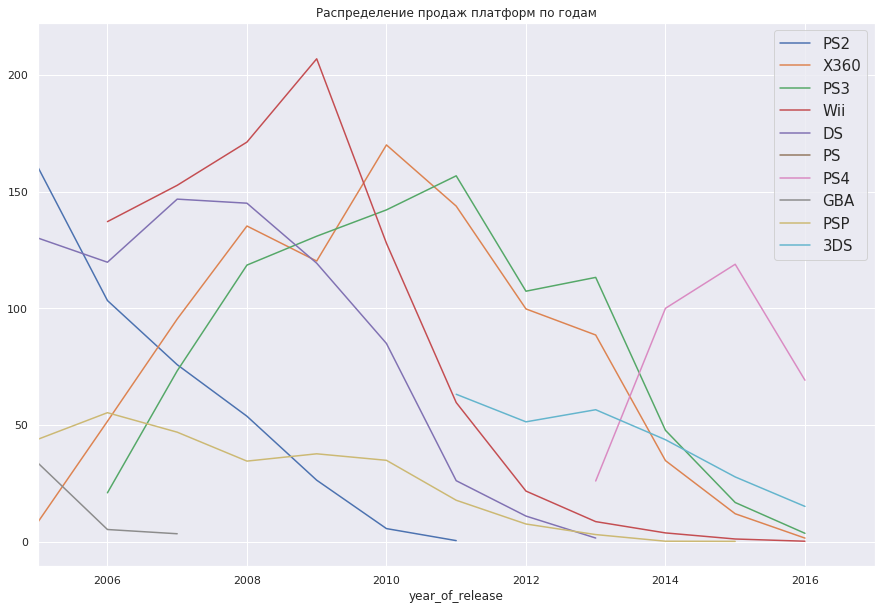

In [38]:
# График распределения продаж по годам для разных платформ
ax = plt.gca()
for index in data_games_platform_pivot.platform:
    # Сводная таблица с данными продаж по годам для платформы
    data_step = (data_games.query("platform == @index").pivot_table(index = 'year_of_release' , 
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index()) 
    # Строим график
    data_step.plot(x = 'year_of_release' , y = 'sum_sales' , ax=ax , figsize = (15,10))

# Рисуем легенду, название, задаем лимиты значений
ax.legend(data_games_platform_pivot.platform, fontsize = 15)
plt.title('Распределение продаж платформ по годам')
plt.xlim([2005, 2017])
plt.show()

In [39]:
# Период существования платформы. 
platform = []    # здесь запишем ключи
years = []   # здесь запишем значения
for value in data_games_platform_pivot.platform:   
    data_games_step = (data_games.loc[data_games['platform']==value].
                                 pivot_table(index = 'year_of_release' ,
                                             values = 'sum_sales',
                                             aggfunc = 'sum').
                                 reset_index()
                      )  
    # Записываем в список разность лет
    years.append(max(data_games_step['year_of_release']) - min(data_games_step['year_of_release']))
    # Записываем в список названия платформ
    platform.append(value)
#Создаем датафрейм 
platform_life = pd.DataFrame({'platform':platform , 'years': years })
#  Выводим среднее значение жизни платформы
platform_life.mean()

years    10.5
dtype: float64

Краткий вывод по этапу:

По полученному среднему значению жизни платформы принимаем актуальный период равный 9 годам.

#### Выбор актуальных данных

In [40]:
# Выбираем из исходной таблицы все игры выпущенные с 2008года
data_games_actual = data_games.query('year_of_release >=2008')
data_games_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63


#### Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ.

In [41]:
# Выбираем платформы с максимальными продажами за выбранный период
data_games_actual_pivot = (data_games_actual.pivot_table(index = ['platform' ] ,
                                                    values = 'sum_sales' ,                                    
                                                     aggfunc = 'sum').
                                         reset_index().
                                        sort_values(by= 'sum_sales' , ascending = False))
                
data_games_actual_pivot

,platform,sum_sales
5,PS3,836.95
11,X360,805.79
9,Wii,600.94
2,DS,387.90
6,PS4,314.03
0,3DS,257.54
13,XOne,159.23
3,PC,150.93
7,PSP,135.63
4,PS2,86.10


Краткий вывод по этапу:

Для дальнейшего анализа принимаем 9 платформ с максимальными продажами.

#### Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Какая разница в продажах? А в средних продажах на разных платформах? Описание результата.

In [42]:
# Создаеем таблицу для построения графиков только с выбранными платформами
data_games_actual_box = data_games_actual[data_games_actual['platform'].
                                          isin(data_games_actual_pivot.head(9)['platform'])]

data_games_actual_box

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,4.8,E,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


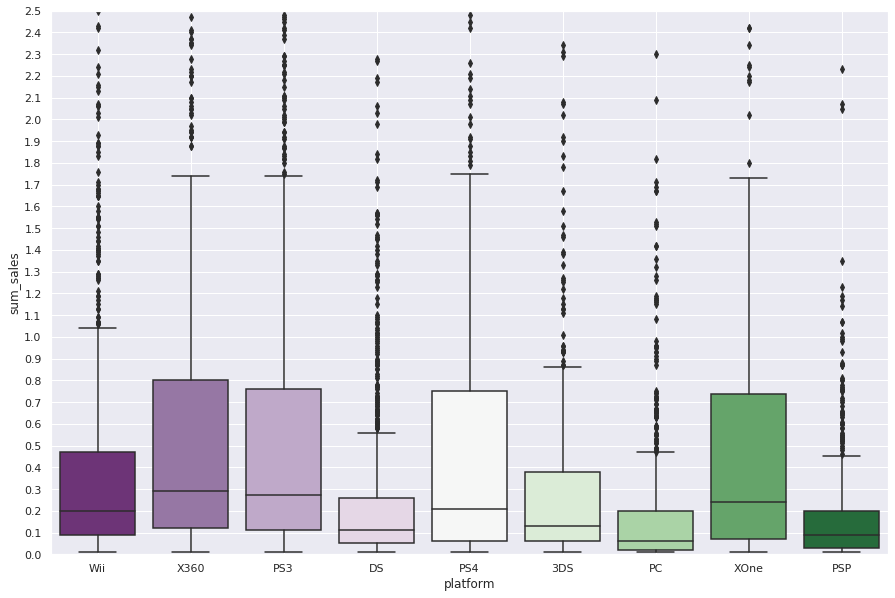

In [43]:
# строим график с усами по выбранным платформам
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="platform", y="sum_sales", data=data_games_actual_box, palette="PRGn" )
ax.set_ylim([0,2.5])
ax.grid(b = True)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

Краткий вывод по результатам анализа графиков с усами:

Медиана суммы продажи одной игры находится в пределах 0,05-0.3 млн.

#### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами

In [44]:
# Выбираем игры на самой популярной платформе X360
data_games_actual_ps3 = data_games_actual.query("platform == 'PS3'")
data_games_actual_ps3.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
104,Battlefield 3,PS3,2011,Shooter,2.85,2.89,0.35,1.08,85.0,7.5,M,7.17


/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


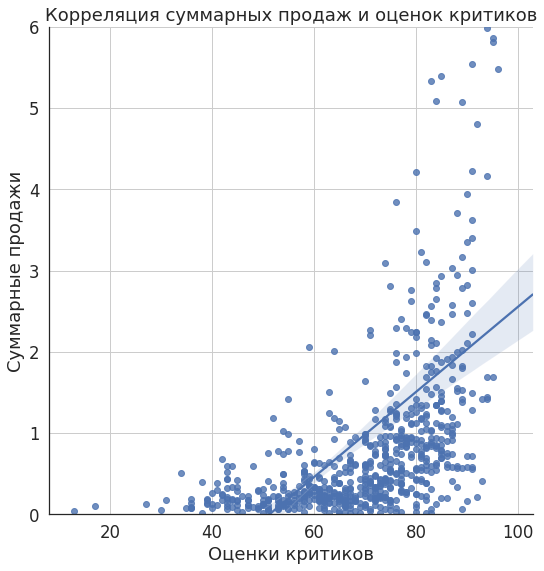

In [45]:
# Задаем шрифт и цвет графика
sns.set(font_scale=1.5,style="white")
# Выводим график, названия,
ax = sns.lmplot(x='critic_score', y='sum_sales', data = data_games_actual_ps3 , size = 8);
ax.set(xlabel = 'Оценки критиков' , ylabel = 'Суммарные продажи' , 
       title  ='Корреляция суммарных продаж и оценок критиков')
ax.set(ylim = (0 , 6));
plt.grid()
plt.show()

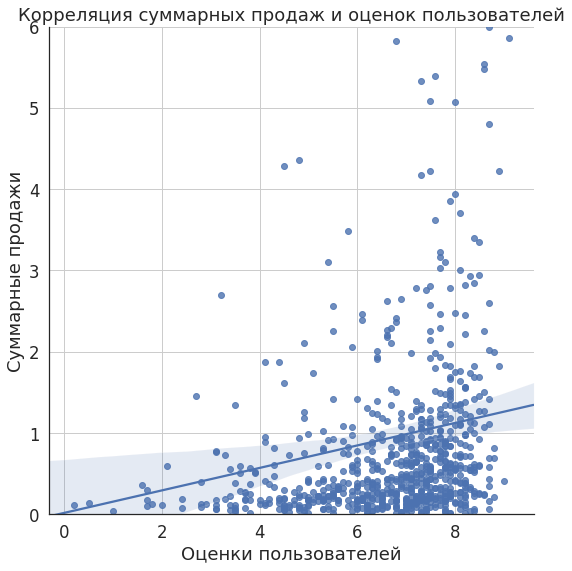

In [46]:
# Задаем шрифт и цвет графика
sns.set(font_scale=1.5,style="white")
# Выводим график, названия,
ax = sns.lmplot(x='user_score', y='sum_sales', data = data_games_actual_ps3 , size = 8);
ax.set(xlabel = 'Оценки пользователей' , ylabel = 'Суммарные продажи' , 
       title  ='Корреляция суммарных продаж и оценок пользователей')
ax.set(ylim = (0 , 6));
plt.grid()
plt.show()


In [47]:
# Значения корреляции между суммарными продажами и оценками критиков и пользователей
data_games_actual_ps3[['sum_sales' , 'critic_score' , 'user_score' ]].corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.433732,0.124857
critic_score,0.433732,1.000000,0.651903
user_score,0.124857,0.651903,1.000000


Краткий вывод по оценки влияния оценок на продажи:

Для платформы PS3  оценка критиков сильнее влияет на продажи, чем оценка пользователей

#### Соотношение выводов с продажами игр на других платформах.

In [48]:
data_games_actual_platforms = (data_games_actual_box.query("critic_score > 0 & user_score > 0")
                            [['platform' , 'critic_score', 'user_score' , 'sum_sales']])
                                                
data_games_actual_platforms

,platform,critic_score,user_score,sum_sales
2,Wii,82.0,8.3,35.52
3,Wii,80.0,8.0,32.77
8,Wii,87.0,8.4,28.32
14,X360,61.0,6.3,21.82
15,Wii,80.0,7.4,21.80
...,...,...,...,...
16692,PC,80.0,7.6,0.01
16696,PC,61.0,5.8,0.01
16698,DS,48.0,4.8,0.01
16702,PC,60.0,7.2,0.01


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


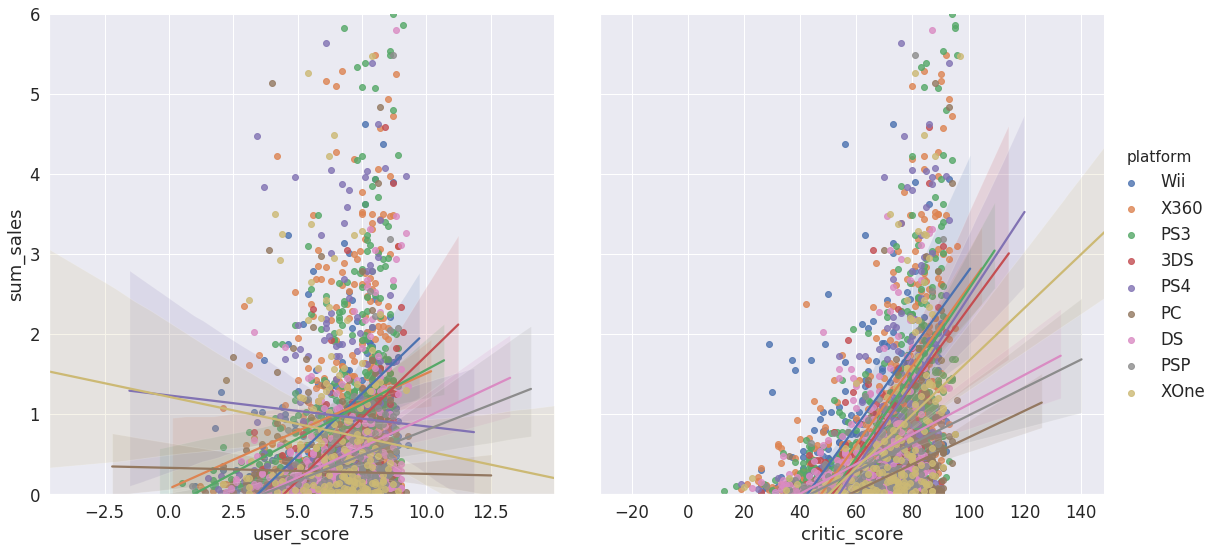

In [49]:
# Рисуем графики рассеияния для всех платформ
sns.set(font_scale = 1.5);
g = sns.pairplot(data_games_actual_platforms , 
             hue = "platform" ,
             kind = "reg" ,
             size = 8 , 
             x_vars = ['user_score' , 'critic_score'],
             y_vars = ['sum_sales']);
# Задаем границы по оси y
g.set(ylim = (0 , 6));

In [50]:
# Расчет корреляции
for value in data_games_actual_box.platform.unique():
    print('Платформа: ' , value)
    print(data_games_actual_box.query("platform == @value")[['critic_score' , 'user_score' , 'sum_sales']].corr())
    print('')

Платформа:  Wii
              critic_score  user_score  sum_sales
critic_score      1.000000    0.722734   0.225109
user_score        0.722734    1.000000   0.151948
sum_sales         0.225109    0.151948   1.000000

Платформа:  X360
              critic_score  user_score  sum_sales
critic_score      1.000000    0.629740   0.388653
user_score        0.629740    1.000000   0.107364
sum_sales         0.388653    0.107364   1.000000

Платформа:  PS3
              critic_score  user_score  sum_sales
critic_score      1.000000    0.651903   0.433732
user_score        0.651903    1.000000   0.124857
sum_sales         0.433732    0.124857   1.000000

Платформа:  DS
              critic_score  user_score  sum_sales
critic_score      1.000000    0.773278   0.307139
user_score        0.773278    1.000000   0.252288
sum_sales         0.307139    0.252288   1.000000

Платформа:  PS4
              critic_score  user_score  sum_sales
critic_score      1.000000    0.557390   0.406568
user_score      

#### Анализ игр по жанрам. 

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [51]:
# Сводна таблица по жанрам
data_games_actual_sum_sales = data_games_actual.pivot_table(index = 'genre', 
                                                            values = ['sum_sales'] , 
                                                            aggfunc = 'sum')                
data_games_actual_sum_sales

,sum_sales
genre,
Action,944.93
Adventure,104.61
Fighting,148.44
Misc,396.04
Platform,195.34
Puzzle,55.44
Racing,226.27
Role-Playing,421.38
Shooter,608.10


#### Вывод по исследовательскому анализу данных
 - Максимальное количество игр выпускалось в 2009 и 2008 годах. После 2009 года количество выпускаемых игр сильно сократилось. Для прогноза на следующий год нет смысла рассматривать игры, выпущенные ранее 2008, т.к. виден тренд снижения выпуска игр. И период, когда количество игр росло, в этом случае не интересен.
 - Для анализа периода жизни платформ выбраны 10 платформ с максимальными продажами. Как видно на грфике распределение продаж по годам для каждой платформы средний период нахождения платформы на рынке 5-10лет. При расчете среднего времени жизни платформы получено значение 10,5 лет. Учитывая тренд в количестве выпускаемых игр по годам, принят актуальный период равный 9 годам, т.е. далее будут рассмотрены игры, выпущенные с 2008 года.
 - В переменную data_games_actual сохранена таблица с отсортированным значения по году выпуска игр методом query().
 - Выбраны 9 платформ с масимальными продажами.
 - Для выбранных платформ построены графики "ящик с усами". По графикам видно, что медиана суммы продаж одной игры на разных платформах лежит в пределах 0,05 - 0,3 , т.е. различается в 6 раз. Но в среднем от одной игры продажи находятся в пределах 0,3.
 - Для анализа влияния оценок критиков и пользователей на продажи игр выбрана платформа с максимальными продажами за актуальный период - PS3.  С помощью библиотеки seaborn построены графики рассеяния lmplot() между оценками критиков и суммарными продажами, и между оценками пользователей и суммарными продажами. Для каждого столбца были расчитаны коэффициенты корреляции методом corr(). По наклону прямых и значениям коэффициентов корреляции видно, что оценка критиков коррелирует сильнее с продажами, чем оценка пользователей.
 - С помощью библиотеки seaborn построены графики рассеяния pairplot для других платформ. Также определены значения коэффициентов корреляции между между оценками и продажами. По наклону прямых и значениям коэффициентов корреляции видно, что оценка критиков коррелирует сильнее с продажами, чем оценка пользователей. Также видно, что для PC и PS4 есть обратная корреляция между продажами и оценками пользователей.
 - В распределении жанров логично выделяются Action, Sports, Shooter. Меньше продаж у жанра Strategy

### 4. Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). Описание различия в долях продаж

In [52]:
# Сводная таблица по  платформам для USA
data_games_actual_plat_sales = (data_games_actual.pivot_table(index = ['platform' ] ,
                                                    values = 'sum_sales' ,                                    
                                                     aggfunc = 'sum'))
                             
data_games_actual_na = data_games_actual.pivot_table(index = ['platform' ] ,
                                                    values = 'na_sales' ,                                    
                                                     aggfunc = 'sum')                   
                                  
# Создаем столбец доли продажи платформы по региону                      
data_games_actual_na['platform_ratio'] =round(data_games_actual_na['na_sales'] /
                                        data_games_actual_plat_sales['sum_sales'] , 2)
data_games_actual_na.sort_values(by = 'na_sales' , ascending = False).head(5)

,na_sales,platform_ratio
platform,,
X360,490.67,0.61
PS3,349.12,0.42
Wii,332.78,0.55
DS,198.57,0.51
PS4,108.72,0.35


In [53]:
# Сводная таблица по  платформам для Europe
data_games_actual_eu = data_games_actual.pivot_table(index = ['platform' ] ,
                                                    values = 'eu_sales' ,                                    
                                                     aggfunc = 'sum')
                                    
# Создаем столбец доли продажи платформы по региону                     
data_games_actual_eu['platform_ratio'] =round(data_games_actual_eu['eu_sales'] /
                                        data_games_actual_plat_sales['sum_sales'] , 2)
data_games_actual_eu.sort_values(by = 'eu_sales' , ascending = False).head(5)


,eu_sales,platform_ratio
platform,,
PS3,293.65,0.35
X360,234.85,0.29
Wii,170.60,0.28
PS4,141.04,0.45
PC,91.86,0.61


In [54]:
# Сводная таблица по платформам для Japan
data_games_actual_jp = data_games_actual.pivot_table(index = ['platform' ] ,
                                                    values = 'jp_sales' ,                                    
                                                     aggfunc = 'sum')
# Создаем столбец доли продажи платформы по региону                        
data_games_actual_jp['platform_ratio'] =round(data_games_actual_jp['jp_sales'] /
                                        data_games_actual_plat_sales['sum_sales'] , 2)
data_games_actual_jp.sort_values(by = 'jp_sales' , ascending = False).head(5)

,jp_sales,platform_ratio
platform,,
3DS,100.48,0.39
DS,75.74,0.20
PS3,73.96,0.09
PSP,59.74,0.44
Wii,46.92,0.08


#### Самые популярные жанры (топ-5). Поясните разницу.

In [55]:
# Сводная таблица по жанрам для USA
data_games_actual_genre_na = data_games_actual.pivot_table(index = ['genre' ] ,
                                                    values = 'na_sales' ,                                    
                                                     aggfunc = 'sum')                                        
# Создаем столбец доли продажи по жанрам по региону                                                     
data_games_actual_genre_na['genre_ratio'] = round(data_games_actual_genre_na['na_sales'] / 
                                            data_games_actual_sum_sales['sum_sales'] , 2)
data_games_actual_genre_na.sort_values(by = 'na_sales' , ascending = False).head(5)

,na_sales,genre_ratio
genre,,
Action,433.66,0.46
Shooter,311.24,0.51
Sports,276.21,0.49
Misc,211.51,0.53
Role-Playing,155.81,0.37


In [56]:
# Сводная таблица по жанрам для Europe
data_games_actual_genre_eu = data_games_actual.pivot_table(index = ['genre' ] ,
                                                    values = 'eu_sales' ,                                    
                                                     aggfunc = 'sum')
# Создаем столбец доли продажи по жанрам по региону                                     
data_games_actual_genre_eu['genre_ratio'] = round(data_games_actual_genre_eu['eu_sales'] / 
                                            data_games_actual_sum_sales['sum_sales'] , 2)                               
                
data_games_actual_genre_eu.sort_values(by = 'eu_sales' , ascending = False).head(5)

,eu_sales,genre_ratio
genre,,
Action,310.34,0.33
Shooter,208.33,0.34
Sports,185.06,0.33
Misc,106.91,0.27
Role-Playing,94.44,0.22


In [57]:
# Сводная таблица по жанрам для Japan
data_games_actual_genre_jp = data_games_actual.pivot_table(index = ['genre' ] ,
                                                    values = 'jp_sales' ,                                    
                                                     aggfunc = 'sum')
                                         
# Создаем столбец доли продажи по жанрам по региону                               
data_games_actual_genre_jp['genre_ratio'] = round(data_games_actual_genre_jp['jp_sales'] / 
                                            data_games_actual_sum_sales['sum_sales'] , 2)                               
                
data_games_actual_genre_jp.sort_values(by = 'jp_sales' , ascending = False).head(5)

,jp_sales,genre_ratio
genre,,
Role-Playing,137.95,0.33
Action,89.68,0.09
Misc,37.13,0.09
Sports,30.63,0.05
Platform,22.99,0.12


#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [61]:
# Самые популярные жанры для USA
data_games_actual_esrb = (data_games_actual.pivot_table(index = ['rating' ] ,
                                                    values = ['na_sales' , 'eu_sales' , 'jp_sales'] ,                                    
                                                     aggfunc = 'sum')
                         )
# Добавляем столбцы с коэффициентом продаж
# Значение округляем до 2 знаков после запятой
data_games_actual_esrb['eu_ratio'] = round(data_games_actual_esrb ['eu_sales'] / data_games_actual_esrb.sum(axis=1),2)                                                 
data_games_actual_esrb['jp_ratio'] = round(data_games_actual_esrb ['jp_sales'] / data_games_actual_esrb.sum(axis=1),2)                                                 
data_games_actual_esrb['na_ratio'] = round(data_games_actual_esrb ['na_sales'] / data_games_actual_esrb.sum(axis=1),2)                                                 

data_games_actual_esrb


,eu_sales,jp_sales,na_sales,eu_ratio,jp_ratio,na_ratio
rating,,,,,,
E,326.49,77.16,536.76,0.35,0.08,0.57
E10+,144.49,25.67,251.82,0.34,0.06,0.60
EC,0.00,0.00,1.32,0.00,0.00,1.00
M,362.64,39.32,502.58,0.40,0.04,0.56
RP,0.03,0.00,0.00,1.00,0.00,0.00
T,187.57,64.47,303.36,0.34,0.12,0.55


 #### Вывод по анализу портрета пользователя по разным регионам:
  - Различия в платформах между Америкой и Европой только DS и PC: в европе больше играют на PC,  а в Америке также популярно. Больша часть продаж по всем платформам приходится на Америку. В Японии юольшая доля продаж приходится на мобильные платформфы 3DS  и DS. Другие платформы менее популярны. Можно сделать вывод, что в Европе и Америке нужно развивать одинаковые платформы. И это дожны быть аналоги Х360, PS3 и PS4. В Японии нужно развивать мобильные платформы, аналоги 3DS.
  - По жанрам распределение топ-5 Америки и Европы одинаковая, но в Америке играют больше. В Японии очень популярен жанр Role-playing , доля продаж игр этого жанра больше чем в Америке и в Европе, при этом в игры других жанров японцы играют значительно реже. Можно сделать вывод, что в Европе и Америке нужно выпускать и продвигать игры из топ 5,  а в японии Role-playing для мобильных платформ.
  - В Америке и Европе доли продаж игр разных рейтингов ESRB примерно одинаковые. В Японии выделяется большая доля игр для подростков (T), чем доля игр дургих рейтингов 

### 5. Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Средние пользовательские рейтинги жанров Action и Sports разные

### 6. Общий вывод